In [3]:
import talib

import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## DEFINING INDICATORS
This is a list of indicators provided by TA-Lib to develop your trading strategies.

In [4]:
Indicators [RSI, Only MACD Histogram(12, 26, 9)]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (667692244.py, line 1)

# TRADING STRATEGY
In this trading strategy, we define entry and exit conditions based on the selected indicators. The conditions are as follows:

### Buy signal 

 - Entry Condition:
       - Condition 1:  Check if RSI crosses above the Zero line.
       - Condition 2: Check if the MACD histogram crosses above the zero line.

 - Exit Condition:
       - Condition 1: Check if the MACD histogram crosses below the zero line.


### Sell signal 

 - Entry Condition:
       - Condition 1: Check if RSI crosses below the Zero line.
       - Condition 2: Check if the MACD histogram crosses below the zero line.

 - Exit Condition:
       - Condition 1:  Check if the MACD histogram crosses above the zero line.



    
    
### Generating Signals:

   - A DataFrame named signals is created to store the buy/sell signals.
   - The 'positions' column is initialized with zeros (no position).
   - The entry_condition is used to set the 'positions' value to 1 (buy signal) where the conditions are met.
   - The exit_condition is used to set the 'positions' value to -1 (sell signal) where the condition is met.

In [5]:
# Define your trading strategy
def strategy(data):
    # Define the entry and exit conditions for buy signal
    condition1_buy = data['MACD'] > data['MACD_SIGNAL']

    entry_condition_buy = condition1_buy 
    exit_condition_buy = data['Close'] < data['MIDDLEBAND']
    
    # Define the entry and exit conditions for sell signal
    condition1_sell = data['MACD'] < data['MACD_SIGNAL']

    entry_condition_sell = condition1_sell 
    exit_condition_sell = data['Close'] > data['MIDDLEBAND']

    # Generate the signals
    signals = pd.DataFrame(index=data.index)
    signals['positions'] = 0
    signals.loc[entry_condition_buy, 'positions'] = 1
    signals.loc[exit_condition_buy, 'positions'] = -1
    signals.loc[entry_condition_sell, 'positions'] = -1
    signals.loc[exit_condition_sell, 'positions'] = 1

    return signals


## HISTORICAL DATA
Next, we download historical stock data for the specified symbol (in this case, 'SPY') from the start date to the end date using the yfinance library.

In [6]:
symbol = 'SPY'
start_date = '2020-01-01'
end_date = '2023-01-01'

data = yf.download(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,307.375641,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,305.048187,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,306.211853,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,305.350922,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,306.978271,68296000


## CALCULATING INDICATORS


In [8]:
# Calculate the indicators
#data['CCI'] = talib.RSI(data['Close'], timeperiod=20)
upperband, middleband, lowerband = talib.BBANDS(data['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
data['UPPERBAND'] = upperband
data['MIDDLEBAND'] = middleband
data['LOWERBAND'] = lowerband

# Calculate MACD
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_SIGNAL'] = macd_signal
data['MACD_HIST'] = macd_hist

In [9]:
data.sample(5)

,Open,High,Low,Close,Adj Close,Volume,UPPERBAND,MIDDLEBAND,LOWERBAND,MACD,MACD_SIGNAL,MACD_HIST
Date,,,,,,,,,,,,
2022-10-19,368.989990,371.850006,365.549988,368.500000,364.068573,79746900,375.100508,366.010004,356.919500,-6.084402,-7.806110,1.721708
2022-04-04,453.130005,456.910004,452.260010,456.799988,447.527222,59601000,463.627331,456.322003,449.016675,5.388904,3.548947,1.839957
2022-07-01,376.559998,381.700012,373.799988,381.239990,375.114441,74839700,389.118730,381.613995,374.109261,-6.630340,-7.573523,0.943183
2021-08-02,440.339996,440.929993,437.209991,437.589996,424.523193,58783300,440.907183,438.917999,436.928816,3.327076,3.385549,-0.058473
2021-11-12,465.119995,467.859985,464.109985,467.269989,454.769226,53466700,470.441473,466.193994,461.946515,6.047634,5.917591,0.130042


## STRATEGY AND BACKTESTING
This section applies the trading strategy to the data and backtests it. It generates buy/sell signals based on the strategy's entry and exit conditions. Then, it calculates the portfolio by taking the difference of positions (signals_1['positions'].diff()) and initializes the first position. It also calculates the returns, strategy returns (returns multiplied by portfolio), and cumulative returns. Finally, it prints the cumulative returns and plots them.

# BB

In [10]:
signals_1 = strategy(data) 

In [11]:
signals_1[(signals_1['positions'] == 1) | (signals_1['positions']==-1)]

,positions
Date,
2020-01-08,1
2020-01-09,1
2020-01-10,1
2020-01-13,1
2020-01-14,1
...,...
2022-12-23,1
2022-12-27,-1
2022-12-28,-1


# PORTFOLIO BB

In [12]:
portfolio = signals_1['positions'].diff()

portfolio.iloc[0] = signals_1['positions'].iloc[0]

data['portfolio'] = portfolio

data['returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['returns']*data['portfolio']

data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()
data['cumulative_returns'] = (1 + data['returns']).cumprod()

Text(0, 0.5, 'Cumulative Returns')

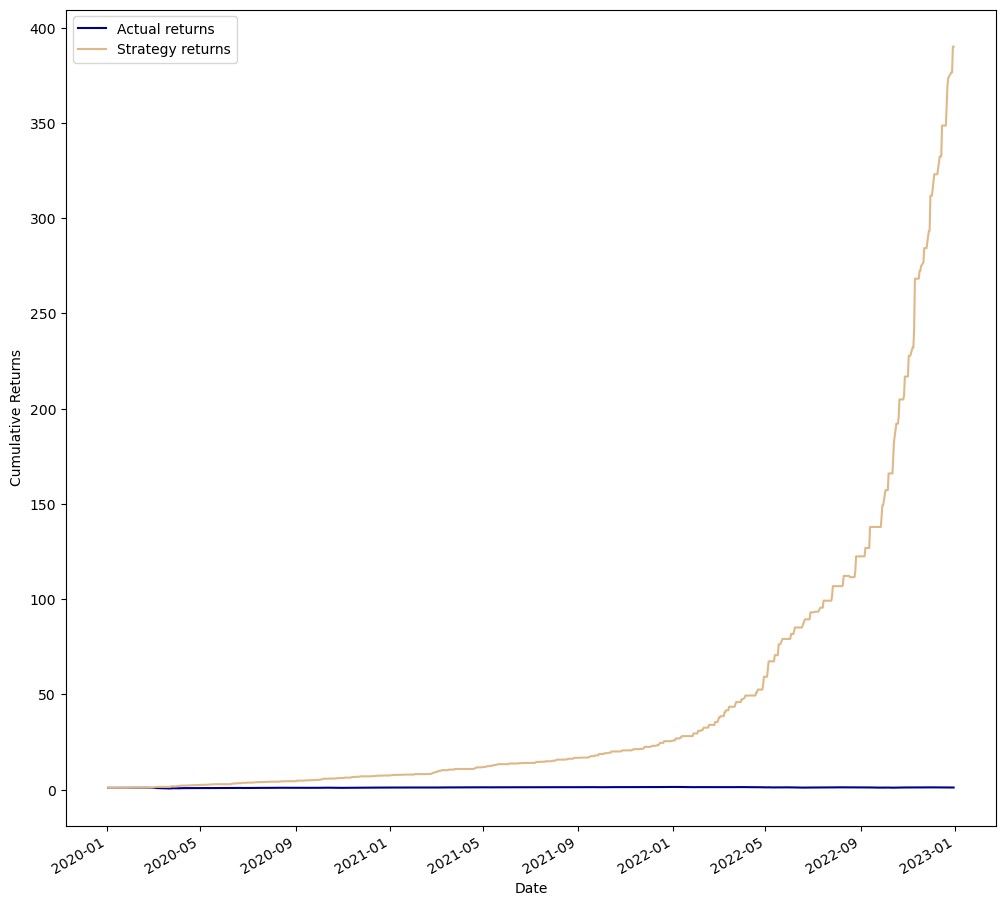

In [13]:
plt.figure(figsize=(12,12))
data['cumulative_returns'].plot(label = 'Actual returns', color='darkblue')
data['cumulative_strategy_returns'].plot(label = 'Strategy returns', color='burlywood')
plt.legend()
plt.ylabel('Cumulative Returns')

In [14]:
standard_dev= (data['Close'].std())
returns = data['cumulative_returns'] 


print(standard_dev)
print(returns)

54.922197078909775
Date
2020-01-02         NaN
2020-01-03    0.992428
2020-01-06    0.996214
2020-01-07    0.993413
2020-01-08    0.998707
                ...   
2022-12-23    1.178656
2022-12-27    1.174008
2022-12-28    1.159418
2022-12-29    1.180288
2022-12-30    1.177179
Name: cumulative_returns, Length: 756, dtype: float64


In [15]:
standard_dev_strat= (data['Close'].std())
returns_strat = data['cumulative_strategy_returns'] #data['strategy_returns'] #1.2 - 1.0/1.0

print(standard_dev_strat)
print(returns_strat)

54.922197078909775
Date
2020-01-02           NaN
2020-01-03      1.000000
2020-01-06      1.000000
2020-01-07      1.000000
2020-01-08      1.005330
                 ...    
2022-12-23    373.547687
2022-12-27    376.493866
2022-12-28    376.493866
2022-12-29    390.047882
2022-12-30    390.047882
Name: cumulative_strategy_returns, Length: 756, dtype: float64


In [16]:
sharpe_original = returns/standard_dev

print(sharpe_original)

Date
2020-01-02         NaN
2020-01-03    0.018070
2020-01-06    0.018139
2020-01-07    0.018088
2020-01-08    0.018184
                ...   
2022-12-23    0.021460
2022-12-27    0.021376
2022-12-28    0.021110
2022-12-29    0.021490
2022-12-30    0.021434
Name: cumulative_returns, Length: 756, dtype: float64


In [17]:
sharpe_strat = returns_strat/standard_dev_strat

print(sharpe_strat)

Date
2020-01-02         NaN
2020-01-03    0.018208
2020-01-06    0.018208
2020-01-07    0.018208
2020-01-08    0.018305
                ...   
2022-12-23    6.801397
2022-12-27    6.855040
2022-12-28    6.855040
2022-12-29    7.101826
2022-12-30    7.101826
Name: cumulative_strategy_returns, Length: 756, dtype: float64


Text(0, 0.5, 'Sharpe ratio]')

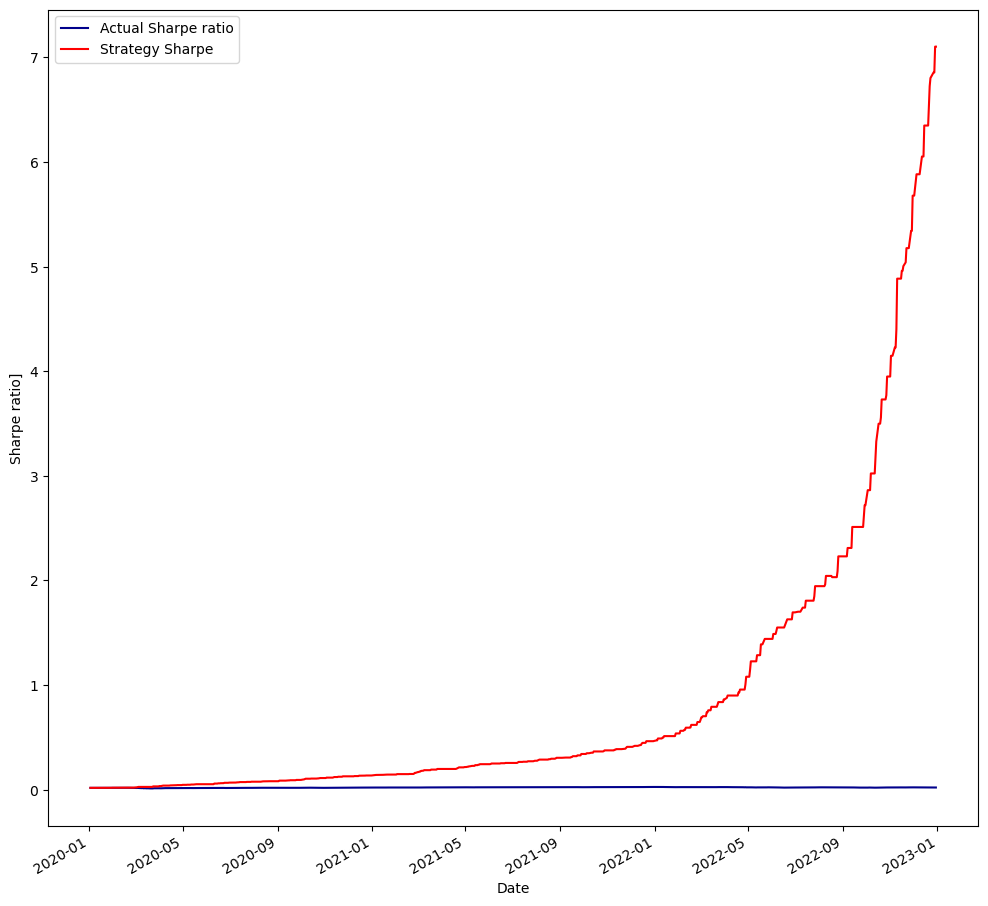

In [18]:
plt.figure(figsize=(12,12))
sharpe_original.plot(label = 'Actual Sharpe ratio', color='darkblue')
sharpe_strat.plot(label = 'Strategy Sharpe', color='red')
plt.legend()
plt.ylabel('Sharpe ratio]')